# Logistic regression practice

## Load data

In [219]:
import numpy as np
import pandas as pd
import string

In [412]:
limited_number_train = 11000
limited_dict_len = 2000
limited_char_count = 1000

def processPunctuation(sentence):
    sentence = sentence.lower()
    sentence = sentence.replace(',', '').replace('?', '').replace('.', '').replace('\'', '').replace('(', '').replace(')', '').replace('?', '').replace('\x96', '')
    
    return sentence

In [413]:
original_data = pd.read_csv('train.csv').sample(frac=1).reset_index(drop=True)[:limited_number_train]
# original_test_data = pd.read_csv('test.csv').sample(frac=1).reset_index(drop=True)[:1000]

X_train = original_data.sample(frac = 0.8, random_state = 0).reset_index(drop=True)
X_dev = original_data.drop(X_train.index).reset_index(drop=True)

y_train = X_train.pop('sentiment').to_frame()
y_dev = X_dev.pop('sentiment').to_frame()

## Produce Word Dictionary

In [414]:
wordDict = {}

for sentence in X_train.loc[:, 'text']:
    sentence = processPunctuation(sentence[:limited_char_count])
    sentence = sentence.split()
    
    for word in sentence:
        if word in wordDict:
            wordDict[word] += 1
        else:
            wordDict[word] = 1

wordDict = dict(sorted(wordDict.items(), key=lambda item: item[1], reverse = True)[:limited_dict_len])
wordDict = dict(zip(wordDict.keys(), range(len(wordDict.keys()))))

In [415]:
def word2vec(sentence):
    sentence = processPunctuation(sentence)
    word2vec = np.zeros(limited_dict_len)
    for word in sentence.split():
        if word in wordDict:
            word2vec[wordDict[word]] = 1
    return word2vec #.reshape(1, limited_dict_len)

#debug
# text = X_train.loc[1, 'text']
# print(word2vec(text))

## Convert sentence

In [416]:
X_train_vec = np.array([word2vec(sentence) for sentence in X_train.loc[:, 'text']])
X_dev_vec = np.array([word2vec(sentence) for sentence in X_dev.loc[:, 'text']])

print(X_train_vec.shape)
print(X_dev_vec.shape)

(8800, 2000)
(2200, 2000)


## Initialise Theta and Bias

In [417]:
def initial_parameters(X):
    n = X.shape[1]
    w = np.random.randn(n, 1) * 1e-2
    b = np.random.randn() * 1e-2
    return w, b

# w, b = initial_parameters(X_train_vec)

#debug
# temp_w, temp_b = initial_parameters(X_train_vec)
# print(temp_w.shape, temp_b)

## Hypethesis Representation

In [418]:
def hypethesis(X, w, b):
    z = np.dot(X, w) + b
    return z

## sigmoid function

In [419]:
def sigmoid(z):
    yhat = 1 / (1 + np.exp(-z))
    return yhat

## Cost function

In [420]:
def cost(y, yhat):
    m = y.shape[0]
    cost = (1 / m) * (np.dot(-y.T, np.log(yhat)) - np.dot((1 - y).T, np.log(1 - yhat)))
    return cost.item()

In [421]:
# z = hypethesis(X_train_vec, w, b)
# yhat = sigmoid(z)
# J = cost(y_train, yhat)

## Gradient descent

In [422]:
def logisticRegression(X_train, X_dev, y_train, y_dev, alpha, epochs):

    # add zero x=1
    X_train = np.insert(X_train, 0, np.ones(range(len(X_train), 1)), axis=1)
    X_dev = np.insert(X_dev, 0, np.ones(range(len(X_dev), 1)), axis=1)
    
    temp_X_train = X_train.copy()
    temp_X_train[:][0] = 0
    
    m = X_train.shape[0]
    w, b = initial_parameters(X_train)
    J_trains = []
    J_devs = []
    
    for epoch in range(epochs):
        z_train = hypethesis(X_train, w, b)
        z_dev = hypethesis(X_dev, w, b)
        
        yhat_train = sigmoid(z_train)
        yhat_dev = sigmoid(z_dev)
        
        J_trains.append(cost(y_train, yhat_train))
        J_devs.append(cost(y_dev, yhat_dev))
        
        w = w - (alpha / m) * np.dot(temp_X_train.T, (yhat_train - y_train))
    
    return w, b, J_trains, J_devs

## Start Training

In [423]:
w, b, J_trains, J_devs = logisticRegression(X_train_vec, X_dev_vec, y_train, y_dev, 1e-1, 8000)

## Plot Cost vaules

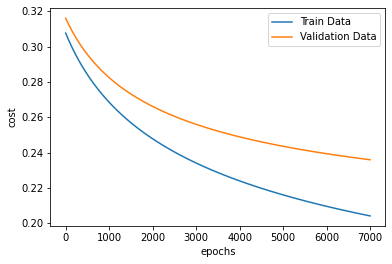

0.2041880979651937
0.23596991478102794


In [424]:
import matplotlib.pyplot as plt

plt.plot(J_trains[1000:], label="Train Data")
plt.plot(J_devs[1000:], label="Validation Data")
plt.ylabel('cost')
plt.xlabel('epochs')
plt.legend()
plt.show()

print(J_trains[-1])
print(J_devs[-1])